In [ ]:
from google.colab import drive
drive.mount('/content/drive')

link="/content/drive/MyDrive/SHAPEFILE/MAPA6362.gpkg"
!pip install fiona geopandas
import geopandas as gpd
from  fiona import listlayers
listlayers(link)

MessageError: Error: credential propagation was unsuccessful

In [ ]:

Mexico=gpd.read_file(link,layer='México')
Estados=gpd.read_file(link,layer='Estados de México')
Municipios=gpd.read_file(link,layer='Municipios de México')
Rios=gpd.read_file(link,layer='Ríos de México')
Aeropuertos=gpd.read_file(link,layer='Aereopuertos de Mexico')

<Axes: >

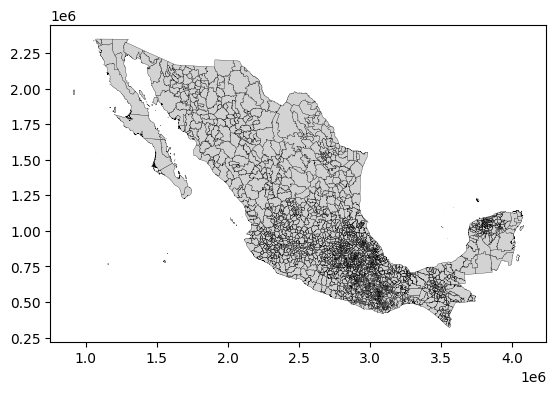

In [ ]:
Municipios.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)
#el mapa de los municipios

In [ ]:
Municipios.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,01008,01,008,San JosÃ© de Gracia,Aguascalientes,0,1,857.790574,181.537599,"MULTIPOLYGON (((2453326.553 1143576.423, 24533..."
1,01009,01,009,TepezalÃ¡,Aguascalientes,1,2,229.661012,89.329532,"MULTIPOLYGON (((2481826.447 1149055.253, 24815..."
2,01007,01,007,RincÃ³n de Romos,Aguascalientes,2,3,372.295163,161.749880,"MULTIPOLYGON (((2476760.231 1150329.045, 24767..."
3,01006,01,006,PabellÃ³n de Arteaga,Aguascalientes,3,4,195.735946,105.612997,"MULTIPOLYGON (((2473996.656 1129304.114, 24742..."
4,01005,01,005,JesÃºs MarÃ­a,Aguascalientes,4,5,499.895092,163.500811,"MULTIPOLYGON (((2463657.764 1116053.82, 246373..."


In [ ]:
len(Municipios.NOMGEO)#observamos el número total de municipios

2475

In [ ]:
len(set(Municipios.NOM_ENT))#Entidades de México

32

<Axes: >

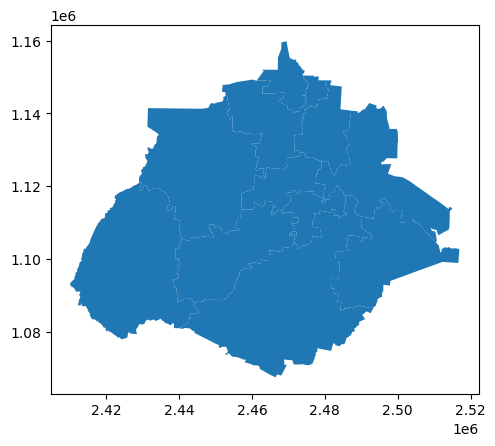

In [ ]:
Municipios[Municipios.NOM_ENT=='Aguascalientes'].plot() #observamos una entidad

In [ ]:
!pip show shapely

Name: shapely
Version: 2.1.1
Summary: Manipulation and analysis of geometric objects
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy
Required-by: bigframes, geopandas, google-cloud-aiplatform, libpysal


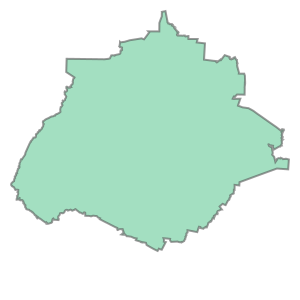

In [ ]:
Municipios[Municipios.NOM_ENT=='Aguascalientes'].union_all() #unimos todo

In [ ]:
#lo guardamos y lo convertimos a GeoDF
Aguascalientes_union=Municipios[Municipios.NOM_ENT=='Aguascalientes'].union_all()

gpd.GeoDataFrame(index=[0],data={'Nom_Ent':'Aguascalientes'},
                 crs=Municipios.crs,
                 geometry=[Aguascalientes_union])


,Nom_Ent,geometry
0,Aguascalientes,"POLYGON ((2493225.932 1086383.198, 2493215.678..."


In [ ]:
#SEGUNDA PARTE

In [ ]:
#Se agruparon los municipios con los estados

<Axes: >

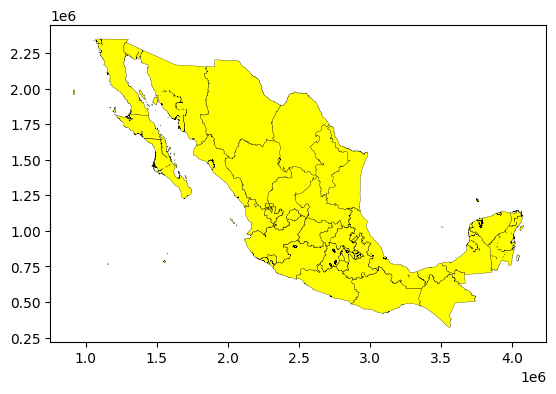

In [ ]:
Municipios.dissolve(by='NOM_ENT').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)